In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import os

# # Load CIFAR-10 dataset from a local file (assuming cifar-10-batches-py is available)
# def load_cifar10_batch(filename):
#     import pickle
#     with open(filename, 'rb') as f:
#         dict = pickle.load(f, encoding='bytes')
#     X = dict[b'data']
#     Y = dict[b'labels']
#     X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
#     Y = np.array(Y)
#     return X, Y

# def load_cifar10(ROOT):
#     xs = []
#     ys = []
#     for b in range(1, 6):
#         f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
#         X, Y = load_cifar10_batch(f)
#         xs.append(X)
#         ys.append(Y)
#     Xtr = np.concatenate(xs)
#     Ytr = np.concatenate(ys)
#     Xte, Yte = load_cifar10_batch(os.path.join(ROOT, 'test_batch'))
#     return Xtr, Ytr, Xte, Yte

# # Set the path to the CIFAR-10 dataset
# cifar10_dir = 'cifar-10-batches-py'

# # Load the data
# x_train, y_train, x_test, y_test = load_cifar10(cifar10_dir)

# # Print shapes
# print("Training data shape:", x_train.shape)
# print("Training labels shape:", y_train.shape)
# print("Test data shape:", x_test.shape)
# print("Test labels shape:", y_test.shape)

# # Rescale data to lie within 0 to 1
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# # Visualize the first 50 images of the training set
# fig, axes = plt.subplots(5, 10, figsize=(15, 7))
# fig.subplots_adjust(hspace=0.5, wspace=0.5)
# for i, ax in enumerate(axes.flat):
#     ax.imshow(x_train[i])
#     ax.axis('off')
# plt.show()

# # One-hot encoding for labels
# def one_hot_encode(y, num_classes):
#     encoded = np.zeros((len(y), num_classes))
#     for idx, val in enumerate(y):
#         encoded[idx, val] = 1
#     return encoded

# num_classes = 10
# y_train_encoded = one_hot_encode(y_train, num_classes)
# y_test_encoded = one_hot_encode(y_test, num_classes)

# # Split training data into training and validation sets
# x_train, x_valid = x_train[5000:], x_train[:5000]
# y_train_encoded, y_valid_encoded = y_train_encoded[5000:], y_train_encoded[:5000]

# print("x_train shape:", x_train.shape)
# print("y_train_encoded shape:", y_train_encoded.shape)
# print("x_valid shape:", x_valid.shape)
# print("y_valid_encoded shape:", y_valid_encoded.shape)

# # Define a simple neural network (from scratch, without any high-level library)
# class SimpleNeuralNetwork:
#     def __init__(self, input_size, hidden_size, output_size):
#         self.W1 = np.random.randn(input_size, hidden_size) * 0.01
#         self.b1 = np.zeros((1, hidden_size))
#         self.W2 = np.random.randn(hidden_size, output_size) * 0.01
#         self.b2 = np.zeros((1, output_size))

#     def relu(self, x):
#         return np.maximum(0, x)

#     def relu_derivative(self, x):
#         return np.where(x <= 0, 0, 1)

#     def softmax(self, x):
#         exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
#         return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

#     def compute_loss(self, y_true, y_pred):
#         corect_logprobs = -np.log(y_pred[range(len(y_true)), np.argmax(y_true, axis=1)])
#         return np.sum(corect_logprobs) / len(y_true)

#     def train(self, x, y, epochs=1000, learning_rate=0.001):
#         for epoch in range(epochs):
#             # Forward pass
#             z1 = np.dot(x, self.W1) + self.b1
#             a1 = self.relu(z1)
#             z2 = np.dot(a1, self.W2) + self.b2
#             a2 = self.softmax(z2)

#             # Compute loss
#             loss = self.compute_loss(y, a2)
#             if epoch % 100 == 0:
#                 print(f'Epoch {epoch}, Loss: {loss}')

#             # Backward pass
#             delta3 = a2 - y
#             dW2 = np.dot(a1.T, delta3)
#             db2 = np.sum(delta3, axis=0, keepdims=True)
#             delta2 = np.dot(delta3, self.W2.T) * self.relu_derivative(z1)
#             dW1 = np.dot(x.T, delta2)
#             db1 = np.sum(delta2, axis=0, keepdims=True)

#             # Update weights
#             self.W1 -= learning_rate * dW1
#             self.b1 -= learning_rate * db1
#             self.W2 -= learning_rate * dW2
#             self.b2 -= learning_rate * db2

#     def predict(self, x):
#         z1 = np.dot(x, self.W1) + self.b1
#         a1 = self.relu(z1)
#         z2 = np.dot(a1, self.W2) + self.b2
#         a2 = self.softmax(z2)
#         return np.argmax(a2, axis=1)

# # Initialize and train the neural network
# input_size = 32 * 32 * 3
# hidden_size = 100
# output_size = 10

# # Flatten the input images
# x_train_flat = x_train.reshape(x_train.shape[0], -1)
# x_valid_flat = x_valid.reshape(x_valid.shape[0], -1)
# x_test_flat = x_test.reshape(x_test.shape[0], -1)

# nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)
# nn.train(x_train_flat, y_train_encoded, epochs=1000, learning_rate=0.001)

# # Evaluate on the validation set
# valid_predictions = nn.predict(x_valid_flat)
# valid_accuracy = np.mean(valid_predictions == np.argmax(y_valid_encoded, axis=1))
# print(f'Validation Accuracy: {valid_accuracy * 100:.2f}%')

# # Evaluate on the test set
# test_predictions = nn.predict(x_test_flat)
# test_accuracy = np.mean(test_predictions == np.argmax(y_test_encoded, axis=1))
# print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


# 导入必要的库

In [2]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import os


# 定义加载 CIFAR-10 数据集的函数

In [3]:
# 定义加载 CIFAR-10 数据集的函数
def load_cifar10_batch(filename):
    import pickle
    with open(filename, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    X = dict[b'data']
    Y = dict[b'labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
    Y = np.array(Y)
    return X, Y

def load_cifar10(ROOT):
    xs = []
    ys = []
    for b in range(1, 6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_cifar10_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    Xte, Yte = load_cifar10_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

# 加载数据并打印其形状

In [4]:
# 设置 CIFAR-10 数据集的路径
cifar10_dir = 'cifar-10-batches-py'

# 加载数据
x_train, y_train, x_test, y_test = load_cifar10(cifar10_dir)

# 打印数据的形状
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


# 数据预处理

In [5]:
# 将数据缩放到 0 到 1 之间
x_train = x_train / 255.0
x_test = x_test / 255.0


# 可视化训练集的前 50 张图像

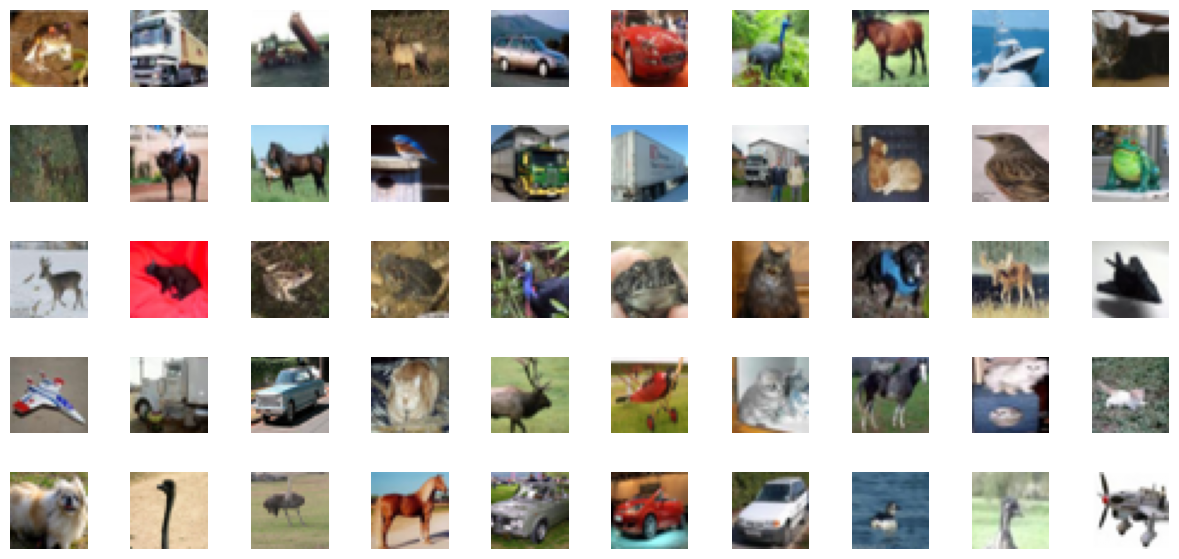

In [6]:
# 可视化训练集的前 50 张图像
fig, axes = plt.subplots(5, 10, figsize=(15, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.axis('off')
plt.show()


# 对标签进行 One-hot 编码

In [7]:
# 对标签进行 One-hot 编码
def one_hot_encode(y, num_classes):
    encoded = np.zeros((len(y), num_classes))
    for idx, val in enumerate(y):
        encoded[idx, val] = 1
    return encoded

num_classes = 10
y_train_encoded = one_hot_encode(y_train, num_classes)
y_test_encoded = one_hot_encode(y_test, num_classes)


# 划分训练集和验证集

In [8]:
# 设置随机种子以便于复现结果
np.random.seed(42)

# 打乱数据集的顺序
shuffle_indices = np.random.permutation(len(x_train))

x_train_shuffled = x_train[shuffle_indices]
y_train_shuffled = y_train_encoded[shuffle_indices]

# 划分训练集和验证集
x_train, x_valid = x_train_shuffled[5000:], x_train_shuffled[:5000]
y_train_encoded, y_valid_encoded = y_train_shuffled[5000:], y_train_shuffled[:5000]

In [9]:
def sigmoid(out):
    '''
    Description: Sigmoid Activation
    Params: out = a list/matrix to perform the activation on
    Outputs: Sigmoid activated list/matrix
    '''
    return 1.0 / (1.0 + np.exp(-out))


def delta_sigmoid(out):
    '''
    Description: Derivative of Sigmoid Activation
    Params: out = a list/matrix to perform the activation on
    Outputs: Delta(Sigmoid) activated list/matrix
    '''
    return sigmoid(out) * (1 - sigmoid(out))

def SigmoidCrossEntropyLoss(a, y):

        return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

# 定义神经网络

In [10]:
import numpy as np
import os

class MultiLayerNeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        # 初始化权重和偏置
        self.layers = len(hidden_sizes) + 1
        self.W = []
        self.b = []

        # 输入层到第一个隐藏层
        self.W.append(np.random.randn(input_size, hidden_sizes[0]) * np.sqrt(2. / input_size))
        self.b.append(np.zeros((1, hidden_sizes[0])))

        # 隐藏层之间
        for i in range(1, len(hidden_sizes)):
            self.W.append(np.random.randn(hidden_sizes[i-1], hidden_sizes[i]) * np.sqrt(2. / hidden_sizes[i-1]))
            self.b.append(np.zeros((1, hidden_sizes[i])))

        # 最后一个隐藏层到输出层
        self.W.append(np.random.randn(hidden_sizes[-1], output_size) * np.sqrt(2. / hidden_sizes[-1]))
        self.b.append(np.zeros((1, output_size)))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x <= 0, 0, 1)

    def softmax(self, x):
        exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def compute_loss(self, y_true, y_pred):
        correct_logprobs = -np.log(y_pred[range(len(y_true)), np.argmax(y_true, axis=1)])
        return np.sum(correct_logprobs) / len(y_true)

    def predict_proba(self, x):
        a = x
        for i in range(self.layers - 1):
            z = np.dot(a, self.W[i]) + self.b[i]
            a = self.relu(z)
        z = np.dot(a, self.W[-1]) + self.b[-1]
        a = self.softmax(z)
        return a

    def predict(self, x):
        return np.argmax(self.predict_proba(x), axis=1)

    def train(self, x_train, y_train, x_valid, y_valid, epochs=100, learning_rate=0.01):
        for epoch in range(epochs):
            # Forward pass
            a = x_train
            activations = [a]
            zs = []
            for i in range(self.layers - 1):
                z = np.dot(a, self.W[i]) + self.b[i]
                a = self.relu(z)
                zs.append(z)
                activations.append(a)
            z = np.dot(a, self.W[-1]) + self.b[-1]
            a = self.softmax(z)
            zs.append(z)
            activations.append(a)

            # Compute loss
            train_loss = self.compute_loss(y_train, a)
            
            # Backward pass
            delta = a - y_train
            dW = [np.dot(activations[-2].T, delta)]
            db = [np.sum(delta, axis=0, keepdims=True)]
            
            for i in range(2, self.layers + 1):
                delta = np.dot(delta, self.W[-i + 1].T) * self.relu_derivative(zs[-i])
                dW.append(np.dot(activations[-i - 1].T, delta))
                db.append(np.sum(delta, axis=0, keepdims=True))

            dW.reverse()
            db.reverse()

            # Update weights
            for i in range(self.layers):
                self.W[i] -= learning_rate * dW[i]
                self.b[i] -= learning_rate * db[i]

            # Validate the model
            val_proba = self.predict_proba(x_valid)
            val_loss = self.compute_loss(y_valid, val_proba)
            val_predictions = np.argmax(val_proba, axis=1)
            val_accuracy = np.mean(val_predictions == np.argmax(y_valid, axis=1))
            
            # Print the results for the current epoch
            print(f'Epoch [{epoch}], train_loss: {train_loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_accuracy:.4f}')

# 假设你已经定义并加载了 CIFAR-10 数据集，并将数据集划分为训练集和验证集
# x_train, y_train_encoded, x_valid, y_valid_encoded

# 定义和训练神经网络
input_size = 32 * 32 * 3
hidden_sizes = [1024, 512, 256, 128]  # 多个隐藏层的大小
output_size = 10

nn = MultiLayerNeuralNetwork(input_size, hidden_sizes, output_size)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_valid_flat = x_valid.reshape(x_valid.shape[0], -1)

nn.train(x_train_flat, y_train_encoded, x_valid_flat, y_valid_encoded)


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_6512\3005242236.py:35: RuntimeWarning: divide by zero encountered in log
  correct_logprobs = -np.log(y_pred[range(len(y_true)), np.argmax(y_true, axis=1)])


Epoch [0], train_loss: 2.4695, val_loss: inf, val_acc: 0.0974
Epoch [1], train_loss: inf, val_loss: inf, val_acc: 0.0952
Epoch [2], train_loss: inf, val_loss: inf, val_acc: 0.1006
Epoch [3], train_loss: inf, val_loss: inf, val_acc: 0.0952
Epoch [4], train_loss: inf, val_loss: inf, val_acc: 0.0970
Epoch [5], train_loss: inf, val_loss: inf, val_acc: 0.0970


KeyboardInterrupt: 

# 初始化和训练神经网络

In [ ]:
# # 定义和训练神经网络
# input_size = 32 * 32 * 3
# hidden_sizes = [512, 256, 128]  # 多个隐藏层的大小
# output_size = 10

# nn = MultiLayerNeuralNetwork(input_size, hidden_sizes, output_size)
# x_train_flat = x_train.reshape(x_train.shape[0], -1)
# x_valid_flat = x_valid.reshape(x_valid.shape[0], -1)

# nn.train(x_train_flat, y_train_encoded, x_valid_flat, y_valid_encoded)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_8332\4194656469.py:35: RuntimeWarning: divide by zero encountered in log
  correct_logprobs = -np.log(y_pred[range(len(y_true)), np.argmax(y_true, axis=1)])


Epoch [0], train_loss: 2.3156, val_loss: inf, val_acc: 0.1046
Epoch [1], train_loss: inf, val_loss: inf, val_acc: 0.0952
Epoch [2], train_loss: inf, val_loss: inf, val_acc: 0.1006
Epoch [3], train_loss: inf, val_loss: inf, val_acc: 0.0952
Epoch [4], train_loss: inf, val_loss: inf, val_acc: 0.1006
Epoch [5], train_loss: inf, val_loss: inf, val_acc: 0.1006
Epoch [6], train_loss: inf, val_loss: inf, val_acc: 0.0952
Epoch [7], train_loss: inf, val_loss: 34.7151, val_acc: 0.0970
Epoch [8], train_loss: 35.1841, val_loss: 34.4343, val_acc: 0.1000
Epoch [9], train_loss: 34.8889, val_loss: 34.9582, val_acc: 0.0974
Epoch [10], train_loss: 35.4578, val_loss: 31.6006, val_acc: 0.1018
Epoch [11], train_loss: 32.0393, val_loss: 30.1889, val_acc: 0.0972
Epoch [12], train_loss: 30.5603, val_loss: 30.6498, val_acc: 0.0974
Epoch [13], train_loss: 31.1029, val_loss: 30.1919, val_acc: 0.1054
Epoch [14], train_loss: 30.7543, val_loss: 28.7811, val_acc: 0.1008
Epoch [15], train_loss: 29.1035, val_loss: 28.4

# 在验证集上进行评估

In [ ]:
# 在验证集上进行评估
valid_predictions = nn.predict(x_valid_flat)
valid_accuracy = np.mean(valid_predictions == np.argmax(y_valid_encoded, axis=1))
print(f'Validation Accuracy: {valid_accuracy * 100:.2f}%')


Validation Accuracy: 9.70%


# 在测试集上进行评估

In [ ]:
# 在测试集上进行评估
test_predictions = nn.predict(x_test_flat)
test_accuracy = np.mean(test_predictions == np.argmax(y_test_encoded, axis=1))
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 10.00%
